**Метод Брента.**

In [209]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from brents_method import one_dim
from brents_method import one_dim_with_derivative
from result import Result

In [171]:
N = 10
epsilons = np.array([0.001 , 0.0009, 0.0008, 0.0007, 0.0006, 0.0005, 0.0004, 0.0003,
       0.0002, 0.0001])
params = []
funcs = []
colors = ['blue', 'red', 'black', 'green', 'violet']

Возьмем для экспериментов следующие функции $f_1(x) = x^2$  , $f_2(x) = (x+5)^4$     ,$\;$$f_3(x) = x{\rm e}^{x}$,     $f_4(x) = x{\rm e}^{-x}$, $\;$  $f_5(x) = \frac{x^4}{ln(x)}$

In [172]:
func_names = []
func_names.append(r'$f_1(x) = x^2$')
func_names.append(r'$f_2(x) = (x+5)^4$')
func_names.append(r'$f_3(x) = x{\rm e}^{x}$')
func_names.append(r'$f_4(x) = x{\rm e}^{-x}$')
func_names.append(r'$f_5(x) = \frac{x^4}{ln(x)}$')

In [173]:
params.append([-1, 10])
funcs.append(lambda x: x**2)

params.append([-6, 2])
funcs.append(lambda x: ((x + 5) ** 4))

params.append([-2, 0])
funcs.append(lambda x: (x * np.exp(x)))

params.append([-2, 6])
funcs.append(lambda x: (x * np.exp(-x)))

params.append([1.1, 1.5])
funcs.append(lambda x: ((x**4)/(np.log(x))))

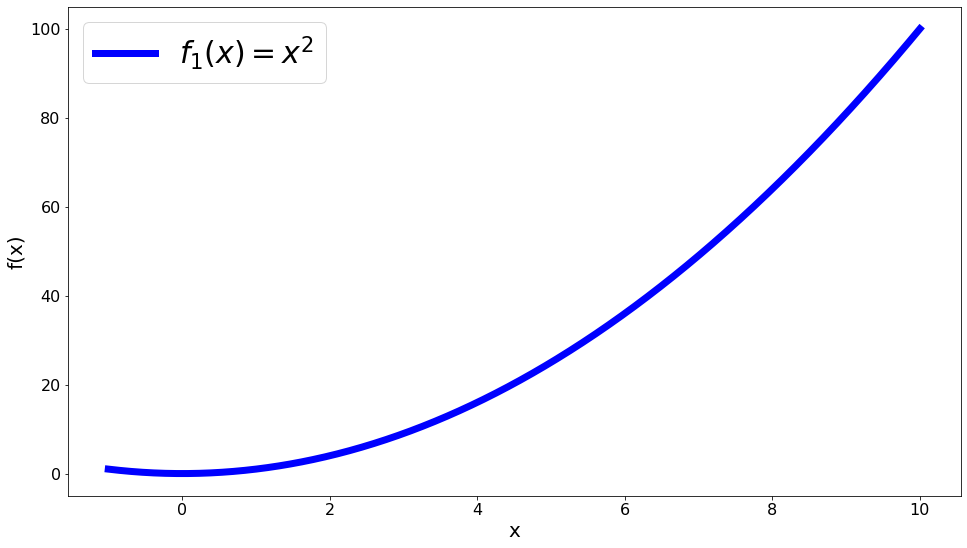

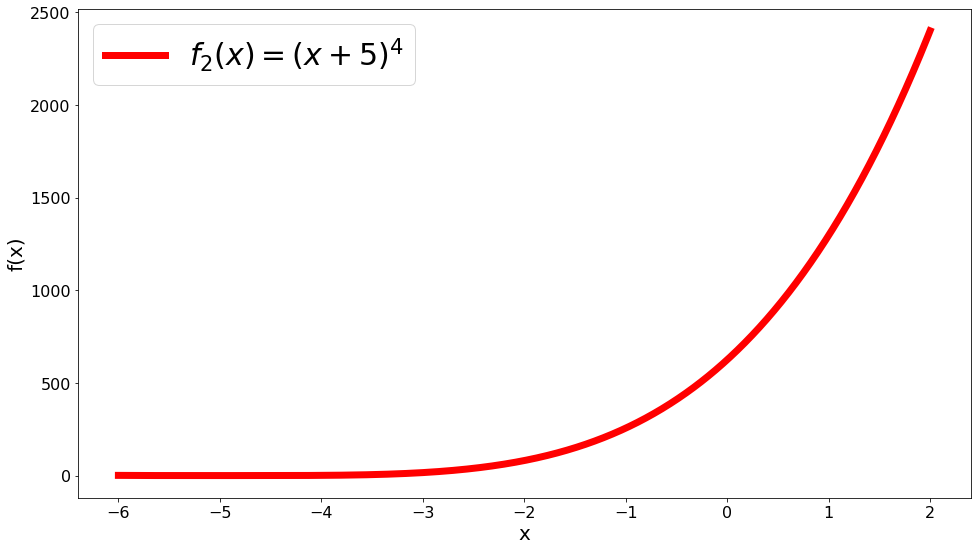

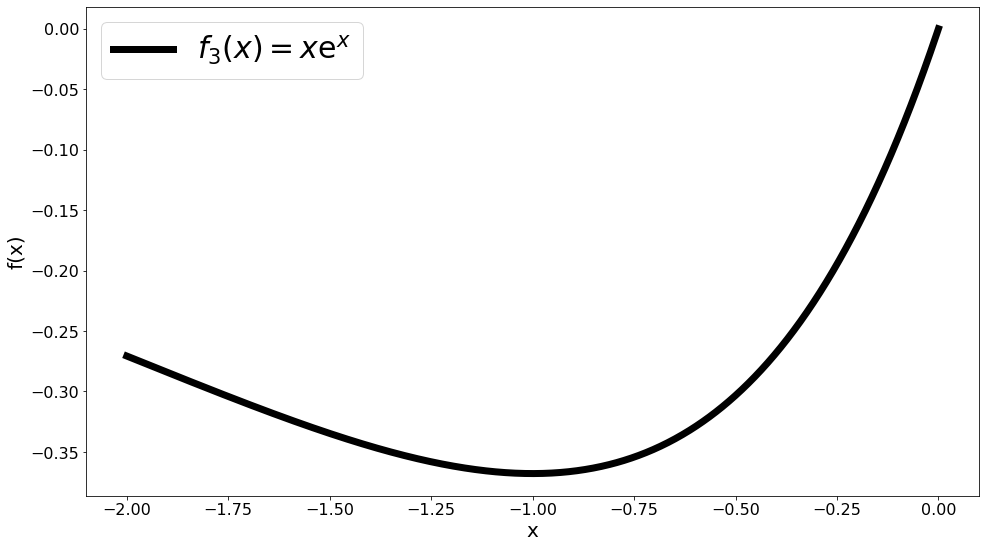

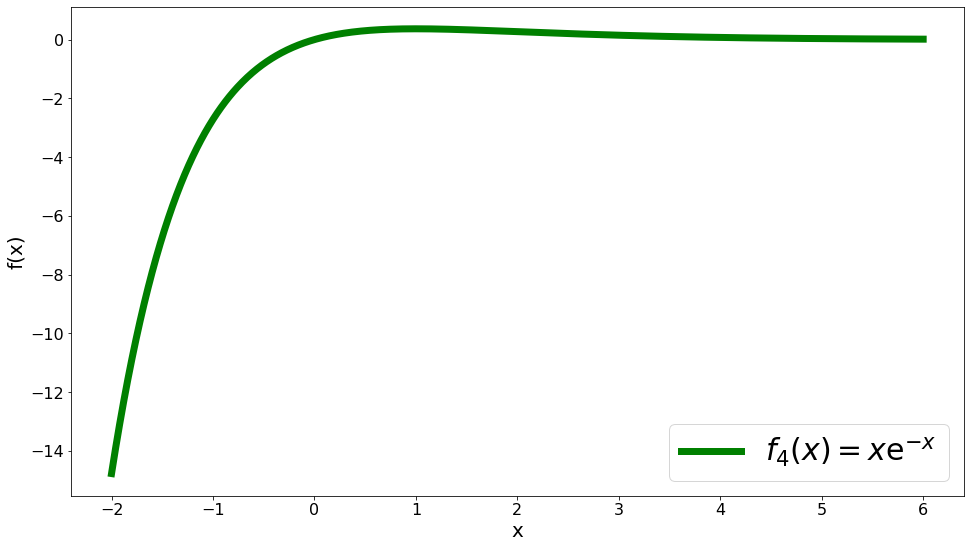

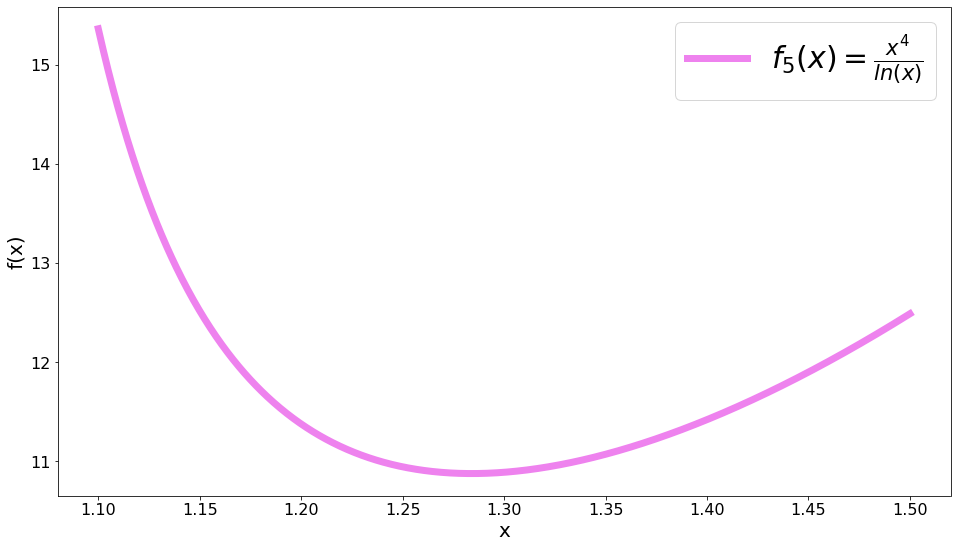

In [174]:
for param, func, func_name, color in zip(params, funcs, func_names, colors):
    fig = plt.figure(figsize=(16, 9))
    grid = np.linspace(param[0], param[1], 1000)
    plt.plot(grid, func(grid), color=color, label=func_name, linewidth = 7)
    plt.xlabel("x", fontsize = 20)
    plt.ylabel("f(x)", fontsize = 20)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.legend(prop={'size': 30})
    plt.show()

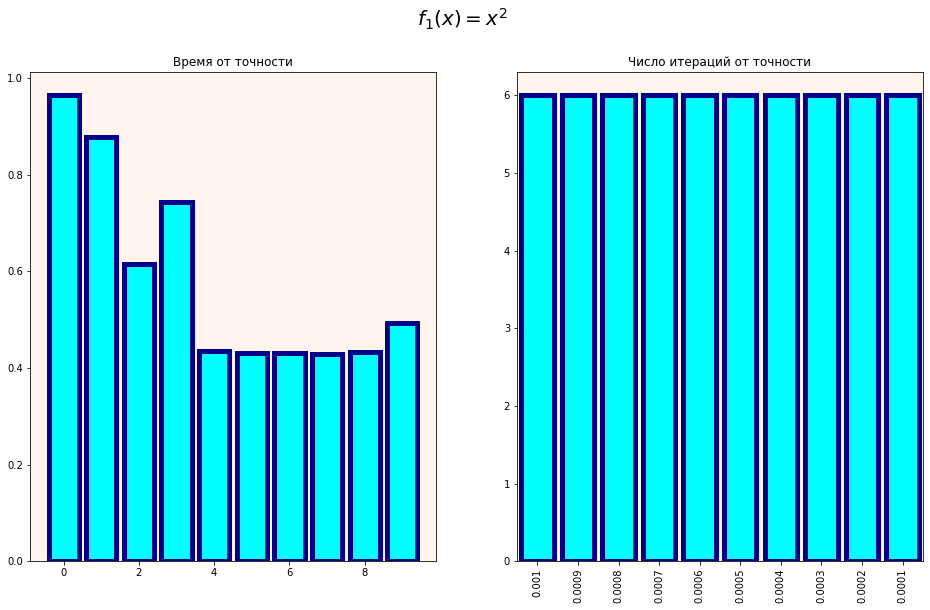

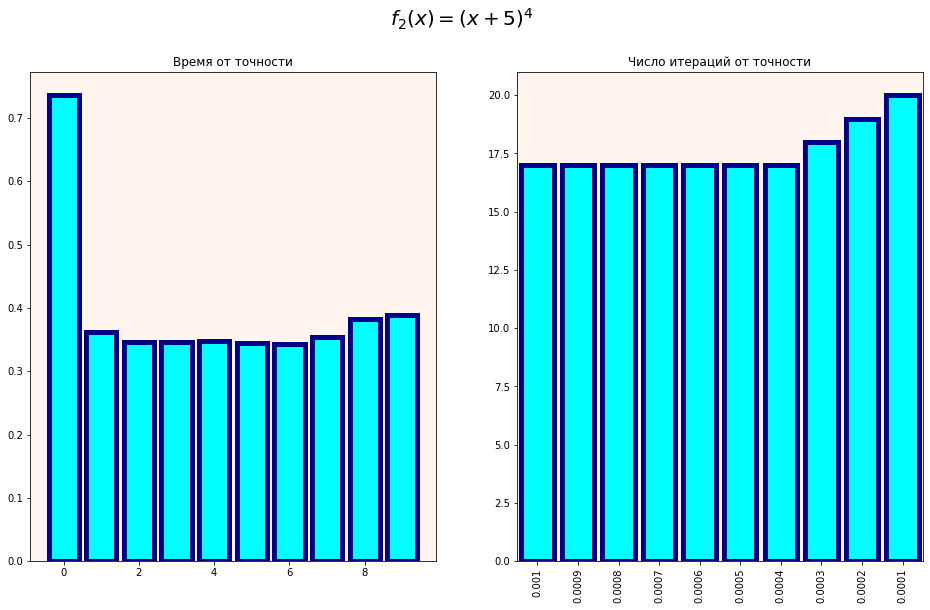

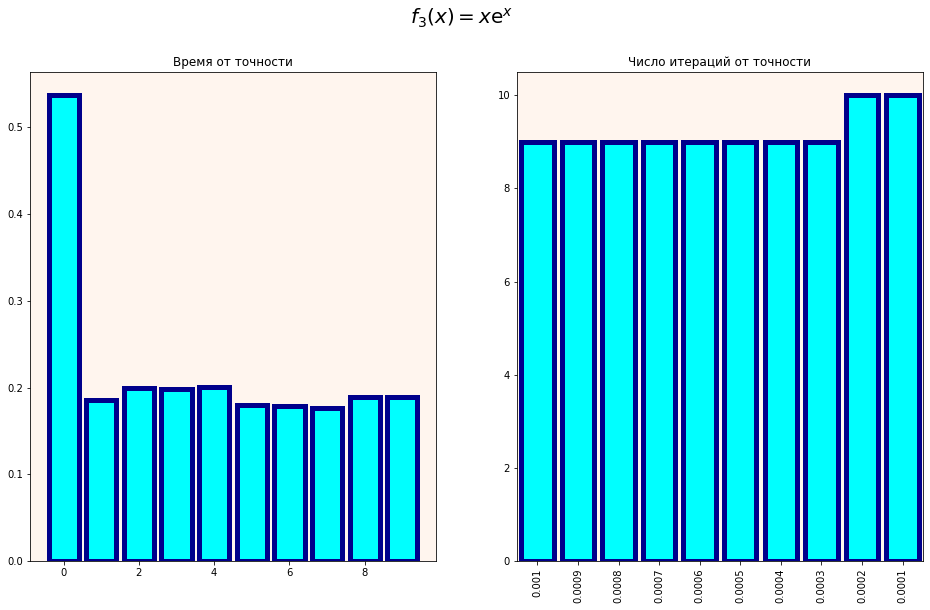

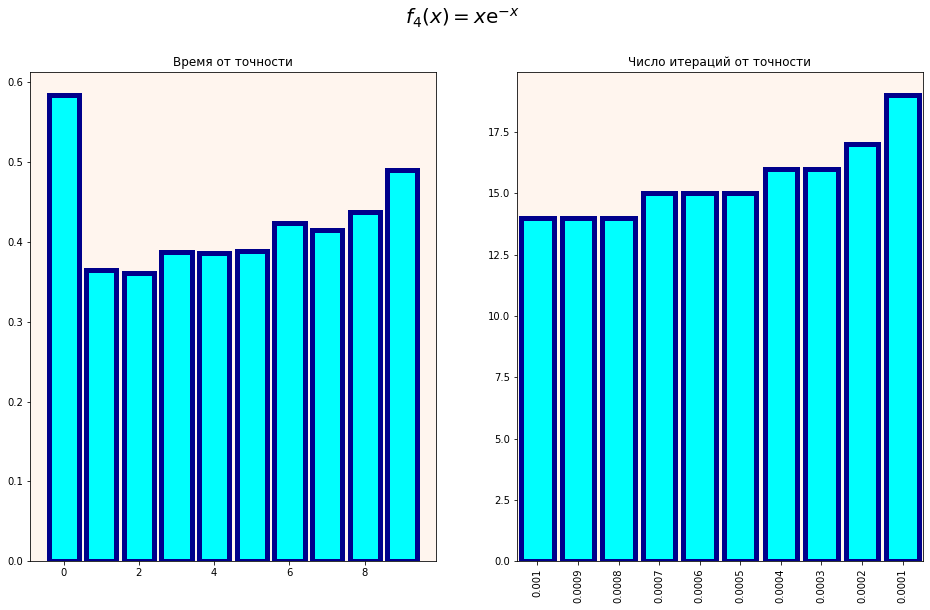

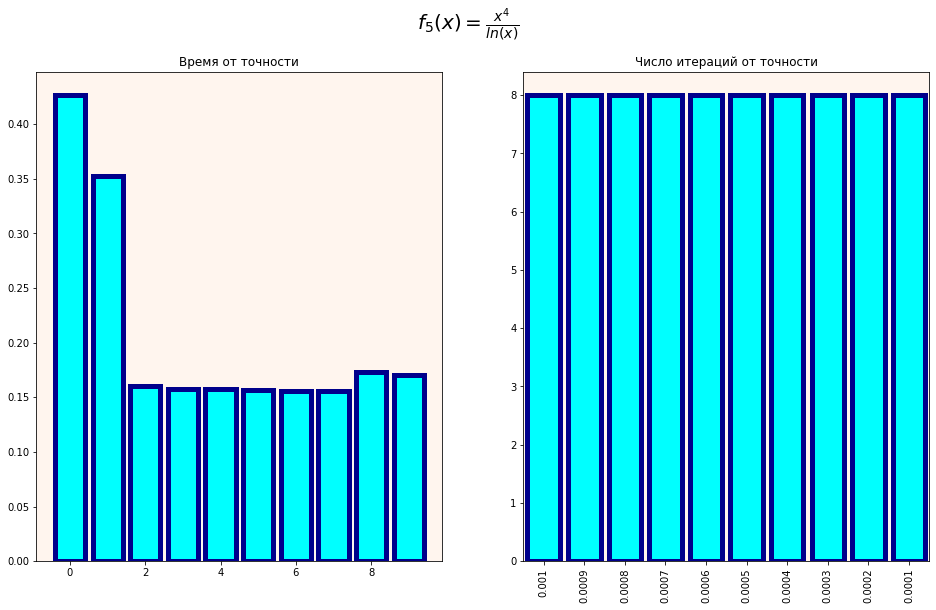

In [204]:
for param, func, func_name in zip(params, funcs, func_names):
    times = []
    iterations = []
    for eps in epsilons:
        res = one_dim(param[0], param[1], func, eps)
        times.append(res.time)
        iterations.append(res.iterations)
        
    fig, axes = plt.subplots(1, 2)
    axes[0].bar(np.arange(0, N), times * np.array(1000), edgecolor = 'darkblue', 
                linewidth = 5, color='aqua')
    freq_series1 = pd.Series(times * np.array(1000))
    #freq_series2 = pd.Series(iterations)
    #axes[0] = freq_series1.plot(kind='bar')
    axes[1] = freq_series1.plot(kind='bar')
    axes[1].bar(np.arange(0, N), iterations, edgecolor = 'darkblue', linewidth = 5, color = 'aqua') 
    axes[0].set_facecolor('seashell')
    axes[1].set_facecolor('seashell')
    fig.set_figwidth(16)    #  ширина Figure
    fig.set_figheight(9)
    fig.suptitle(func_name, fontsize = 20)
    #plt.legend()
    axes[0].set_title("Время от точности")
    axes[1].set_title("Число итераций от точности")
    #axes[0].set_xticklabels(epsilons)
    axes[1].set_xticklabels(epsilons)
    plt.show()
    
    #plt.figure(figsize=(15, 8))
    #plt.plot(np.arange(1, N), iterations, label="iterarions, n", color="orange")
    #plt.legend()
    #plt.show()
    

Минимум функции достигается при x = 0.0


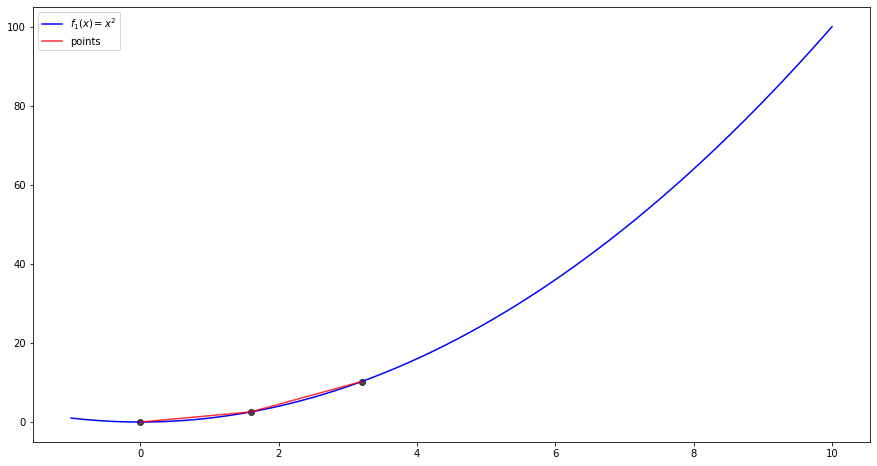

Минимум функции достигается при x = -5.000000264426516


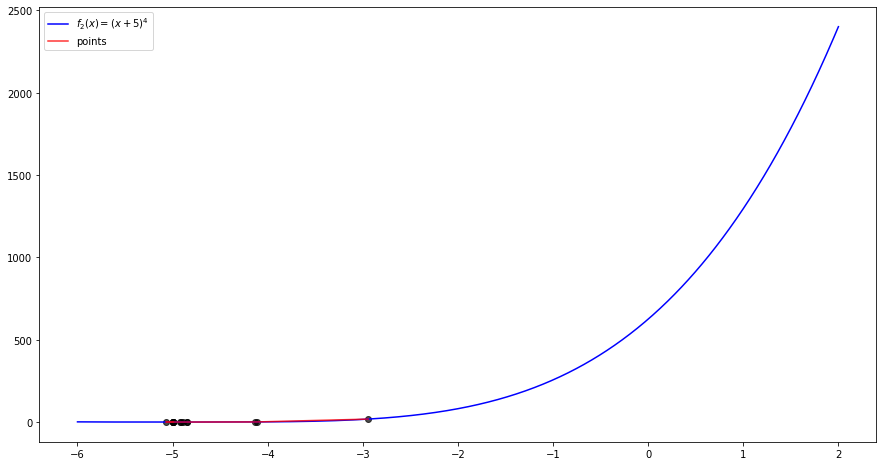

Минимум функции достигается при x = -1.0000004345938815


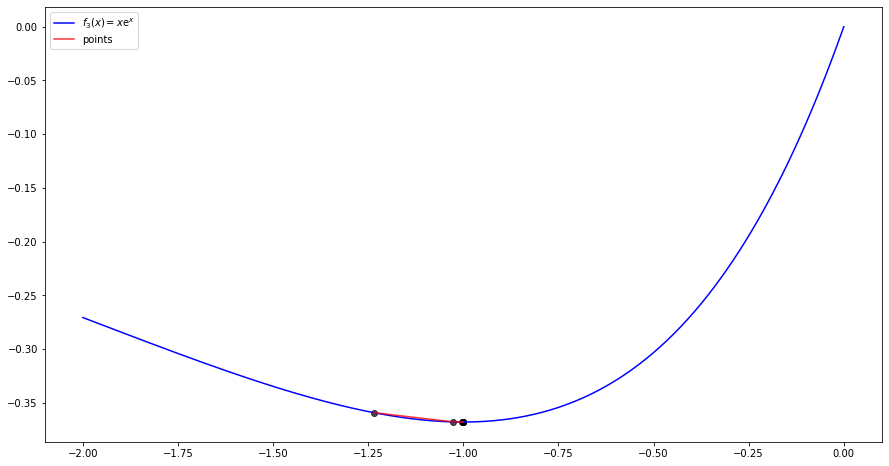

Минимум функции достигается при x = 5.999988649422267


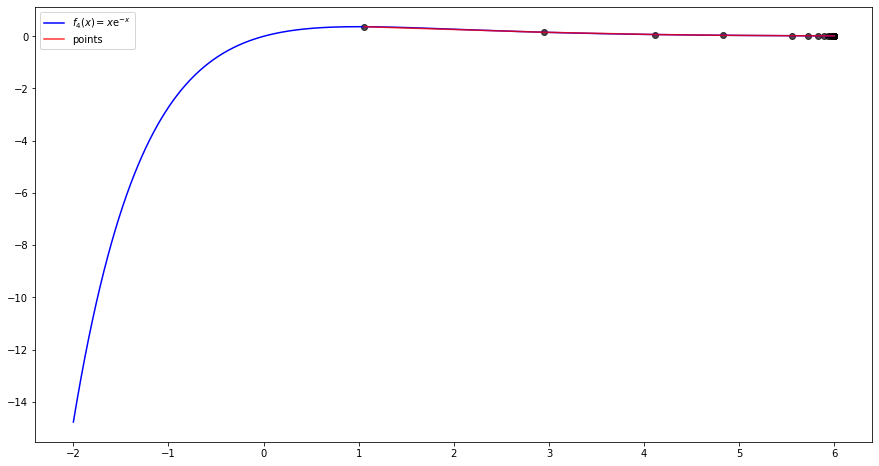

Минимум функции достигается при x = 1.2840249336671383


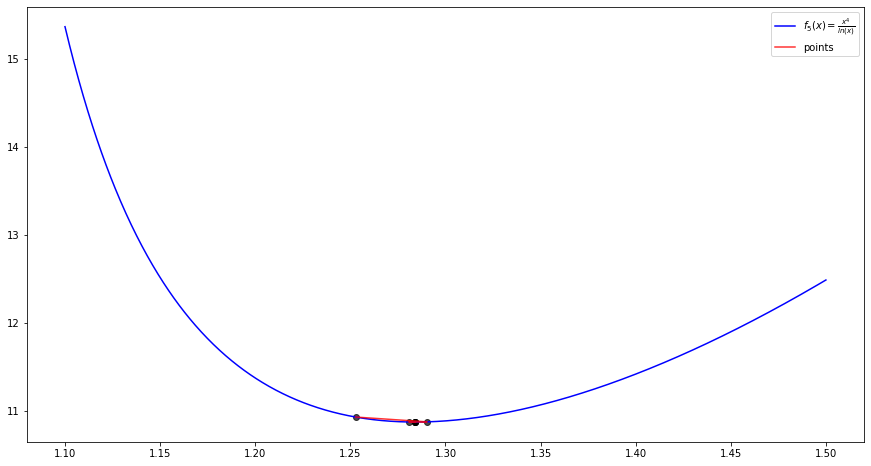

In [197]:
for param, func, func_name in zip(params, funcs, func_names):
    res = one_dim(param[0], param[1], func)
    print(f'Минимум функции достигается при x = {res.x}')
    plt.figure(figsize=(15, 8))
    grid = np.linspace(param[0], param[1], 1000)
    plt.plot(grid, func(grid), color="blue", label=func_name)
    plt.plot(res.points, res.values, alpha=0.8, color="red", label="points")
    plt.scatter(res.points, res.values, color="black", alpha=0.7)
    plt.legend()
    plt.show()
    

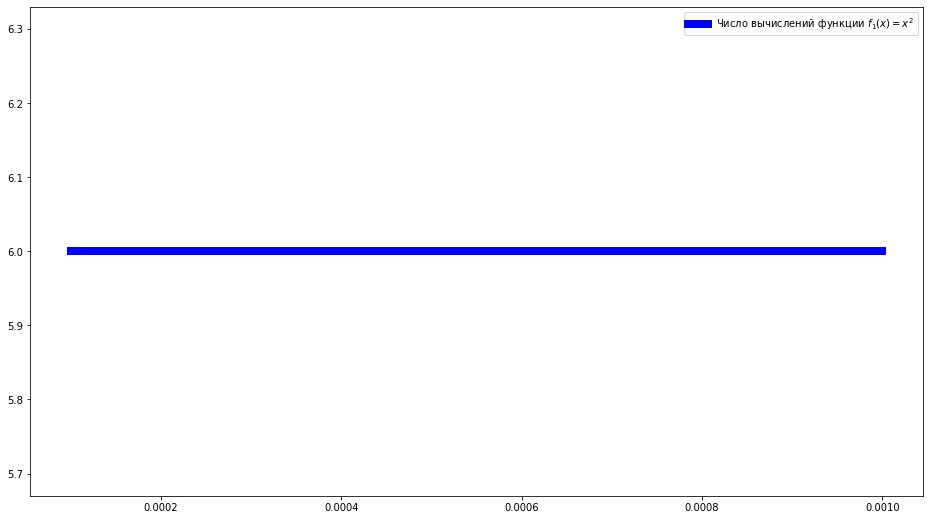

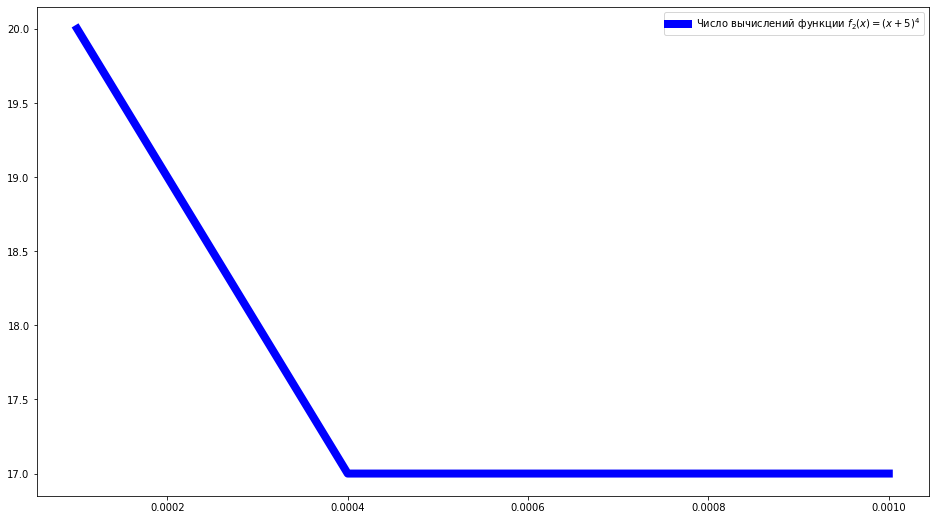

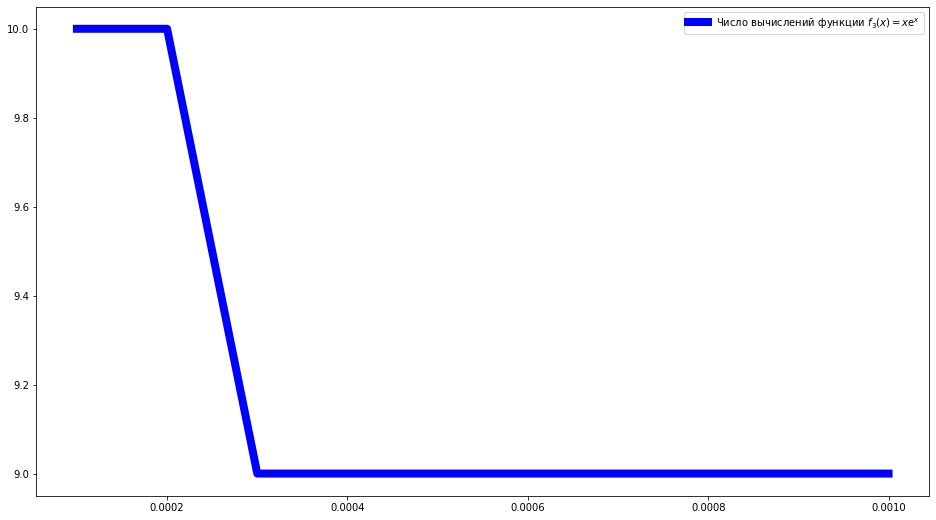

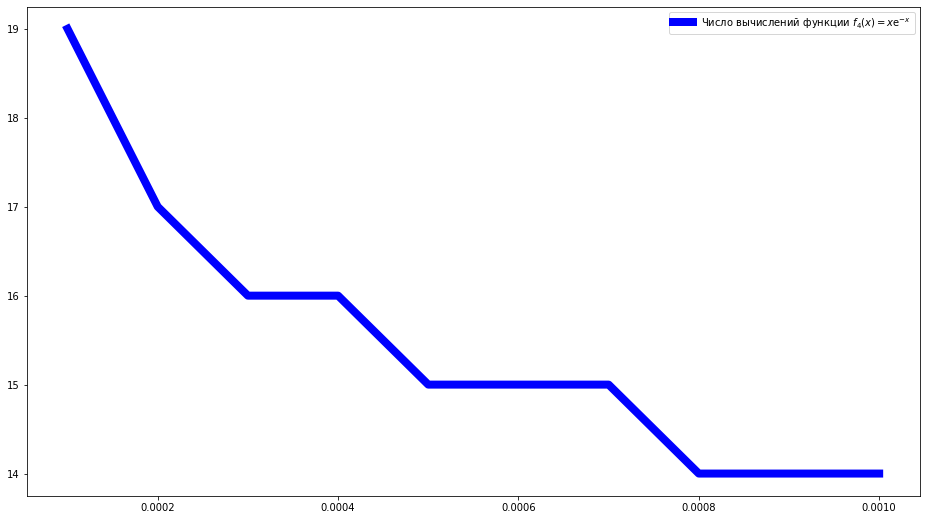

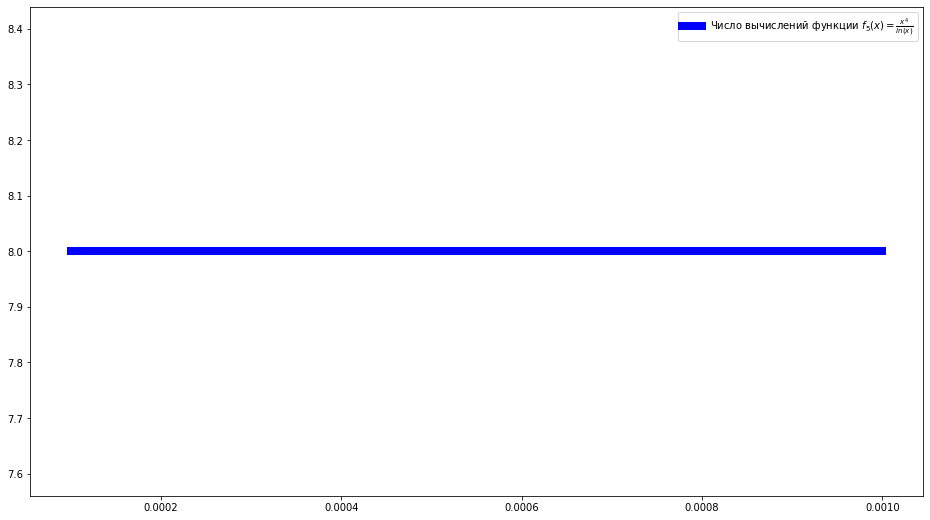

In [213]:
for param, func, func_name in zip(params, funcs, func_names):
    func_comp = []
    der_comp = []
    for eps in epsilons:
        res = one_dim(param[0], param[1], func, eps)
        func_comp.append(res.func_computations)
        der_comp.append(res.derivative_computations)
    plt.figure(figsize=(16, 9))
    plt.plot(epsilons, func_comp, color="blue", label=f'Число вычислений функции {func_name}', linewidth = 8)
    #plt.scatter(res.points, res.values, color="black", alpha=0.7)
    plt.legend()
    plt.show()